### Storing the `MovieLens 25M Dataset` to Neo4j

##### Installations

In [1]:
%pip install -r ../../requirements.txt

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\GiannisAthanasiou\Desktop\diploma\repo\diploma\environ\Scripts\python.exe -m pip install --upgrade pip' command.


#### Imports

In [13]:
import pathlib
import os
import sys
from IPython.display import Image
from py2neo import Graph

#### Connecting to the neo4j instance

In [3]:
graph = Graph(
    "bolt://localhost:11005",
    auth=("neo4j", "admin"),
)

#### Some helpers fot storing the dataset to `neo4j`

##### General helpers

In [4]:
parent_path = pathlib.Path(os.getcwd()).parent.absolute()
sys.path.append(str(parent_path))

from utils.general import read_csv, df_to_json
from utils_draft.movies import insert_movies, insert_movies_genres, insert_movies_years, update_movies_titles
from utils_draft.users import insert_ratings, insert_tags


#### Storing the movies in the database

* I store the following graph:
    * Nodes:
        * Movie
        * Genre
        * Year
    * Edges:
        * (Movie)-[BELONGS_TO]-(Genre)
        * (Movie)-[PUBLISHED_IN]-(Year)

In [5]:
MOVIES_LIMIT = 300

movies_df = read_csv("movies")
movies = df_to_json(movies_df)

insert_movies(graph, movies, MOVIES_LIMIT)
insert_movies_genres(graph)
insert_movies_years(graph)
update_movies_titles(graph)

Reading from: c:\Users\GiannisAthanasiou\Desktop\diploma\repo\diploma\movies_db\data\movies.csv


##### After storing the first 300 movies in the database

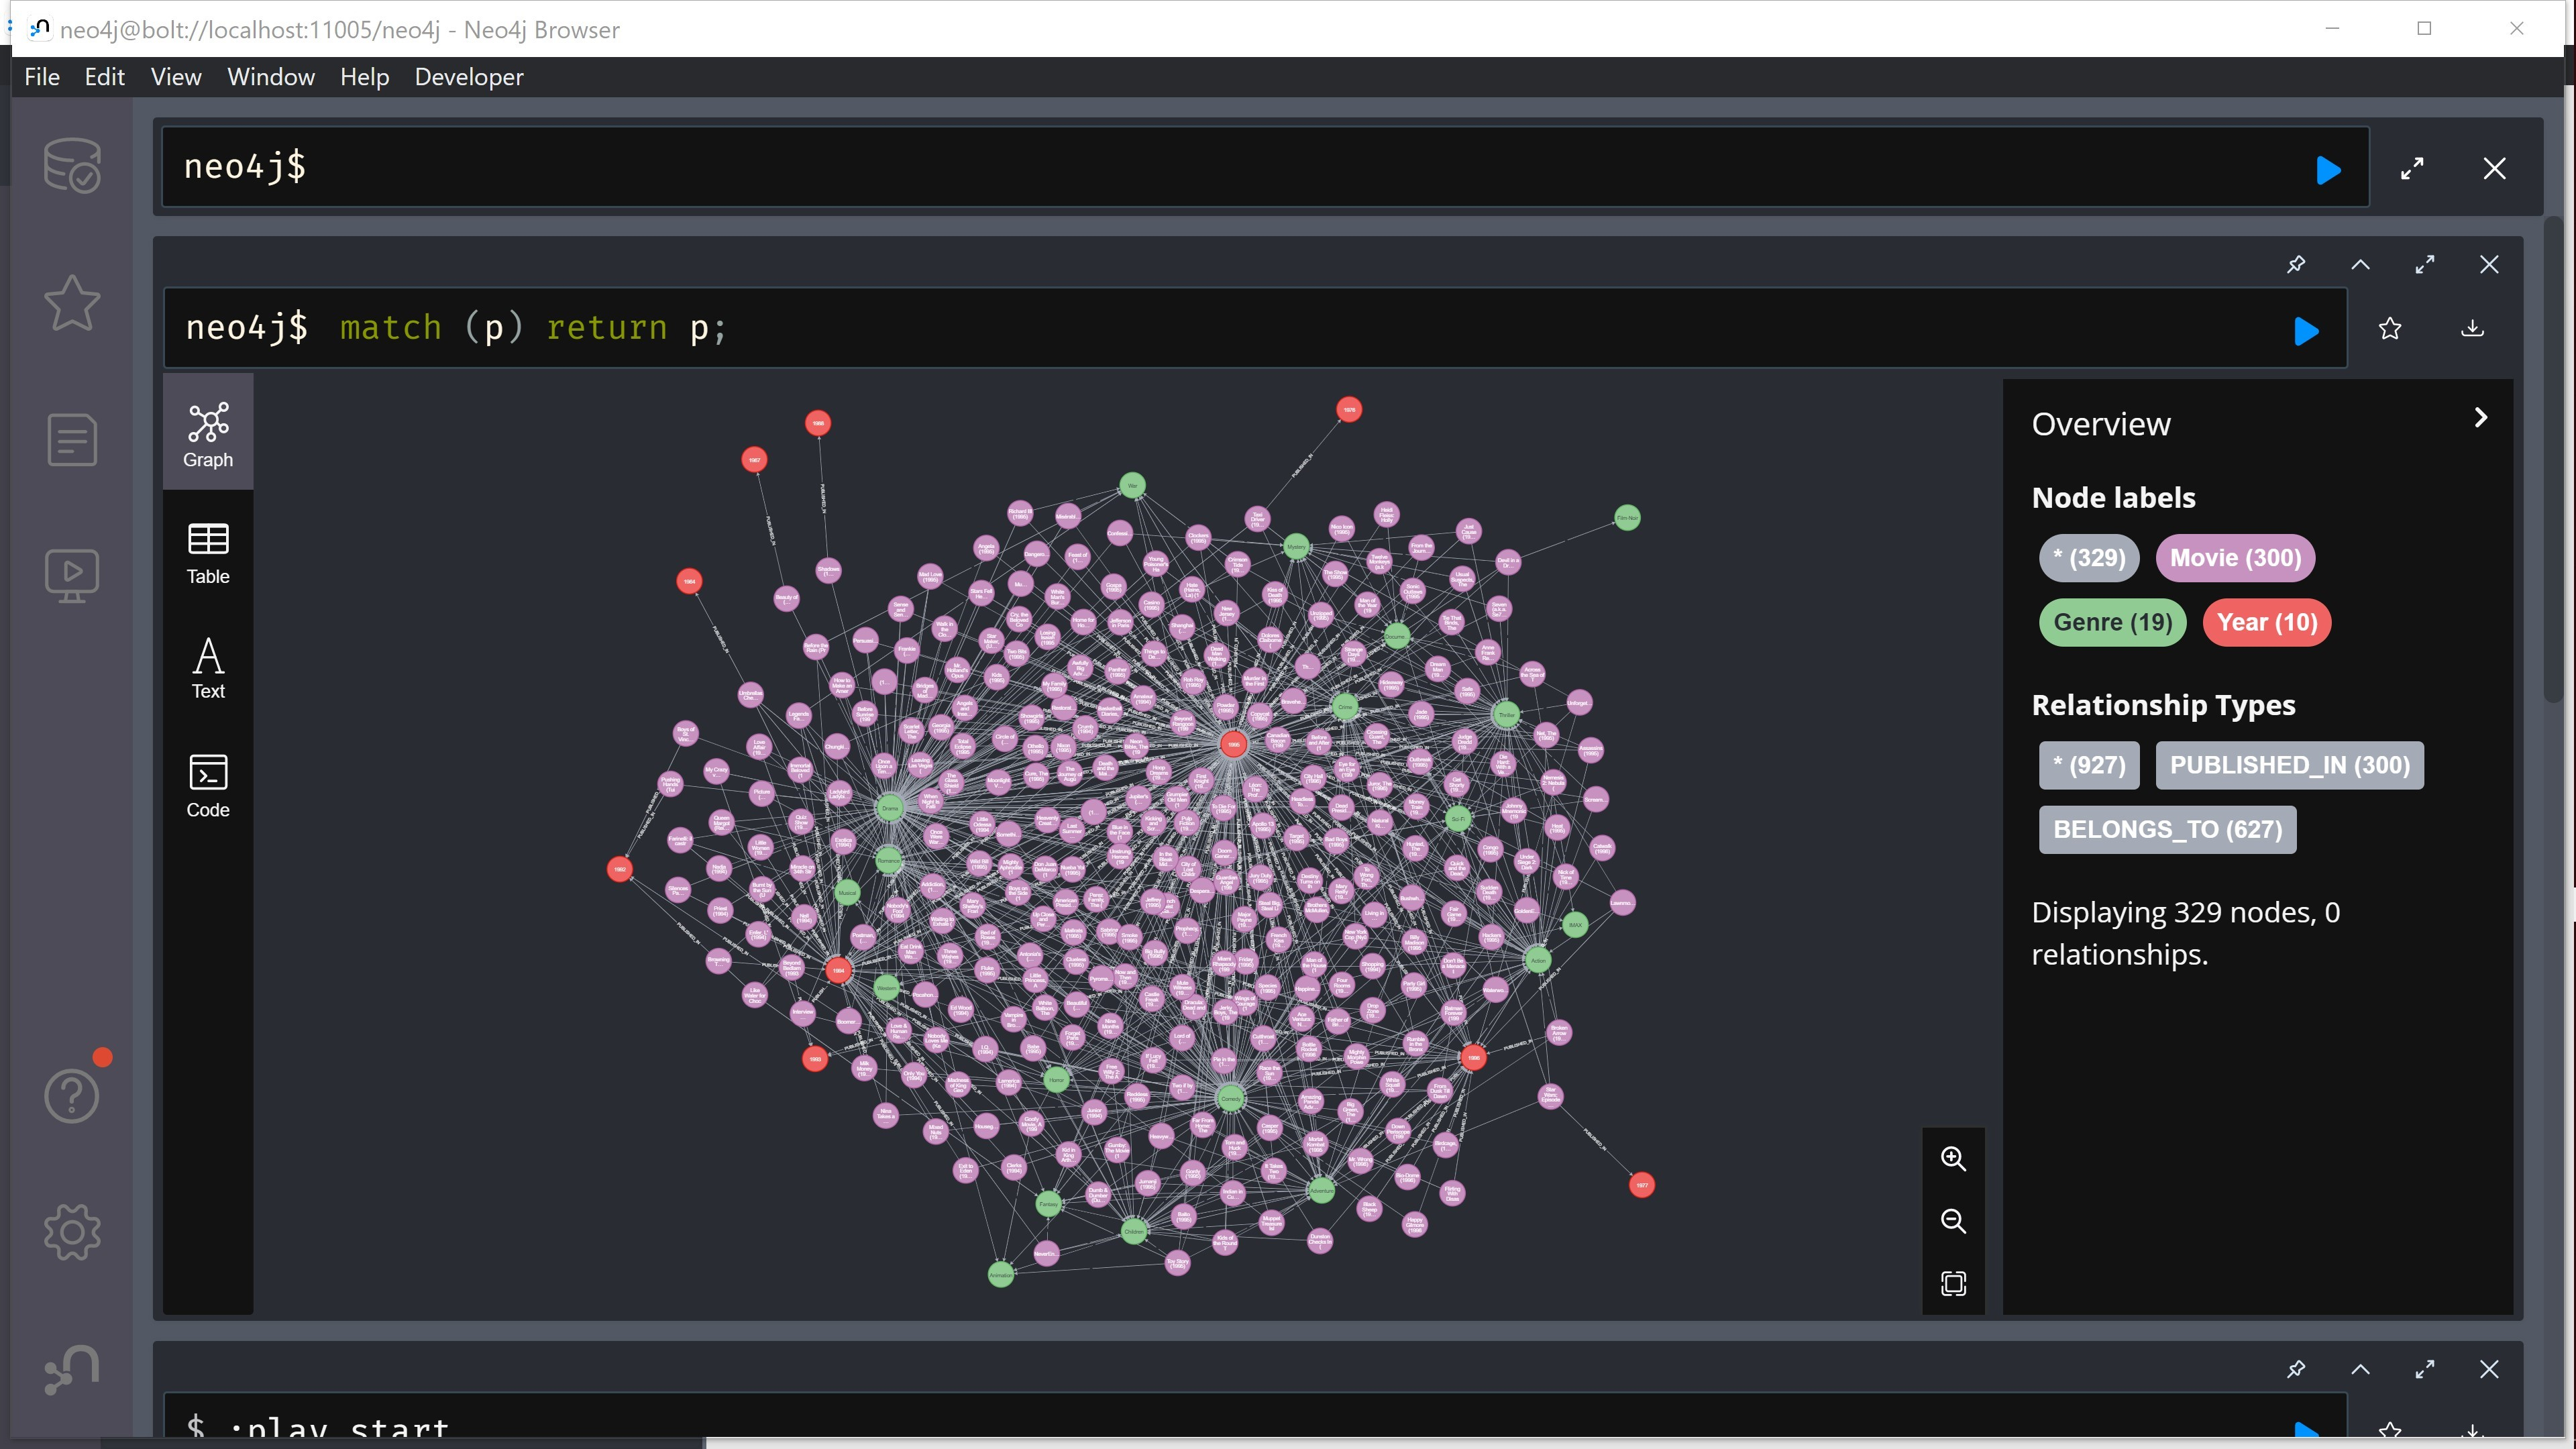

In [14]:
Image(filename='../images/300_movies.jpg') 

##### Storing the first ratings in the database

In [7]:
RATINGS_LIMIT = 10000
ratings_df = read_csv("ratings")
ratings = df_to_json(ratings_df)

Reading from: c:\Users\GiannisAthanasiou\Desktop\diploma\repo\diploma\movies_db\data\ratings.csv


In [8]:
insert_ratings(graph, ratings, RATINGS_LIMIT)

##### After storing the ratings

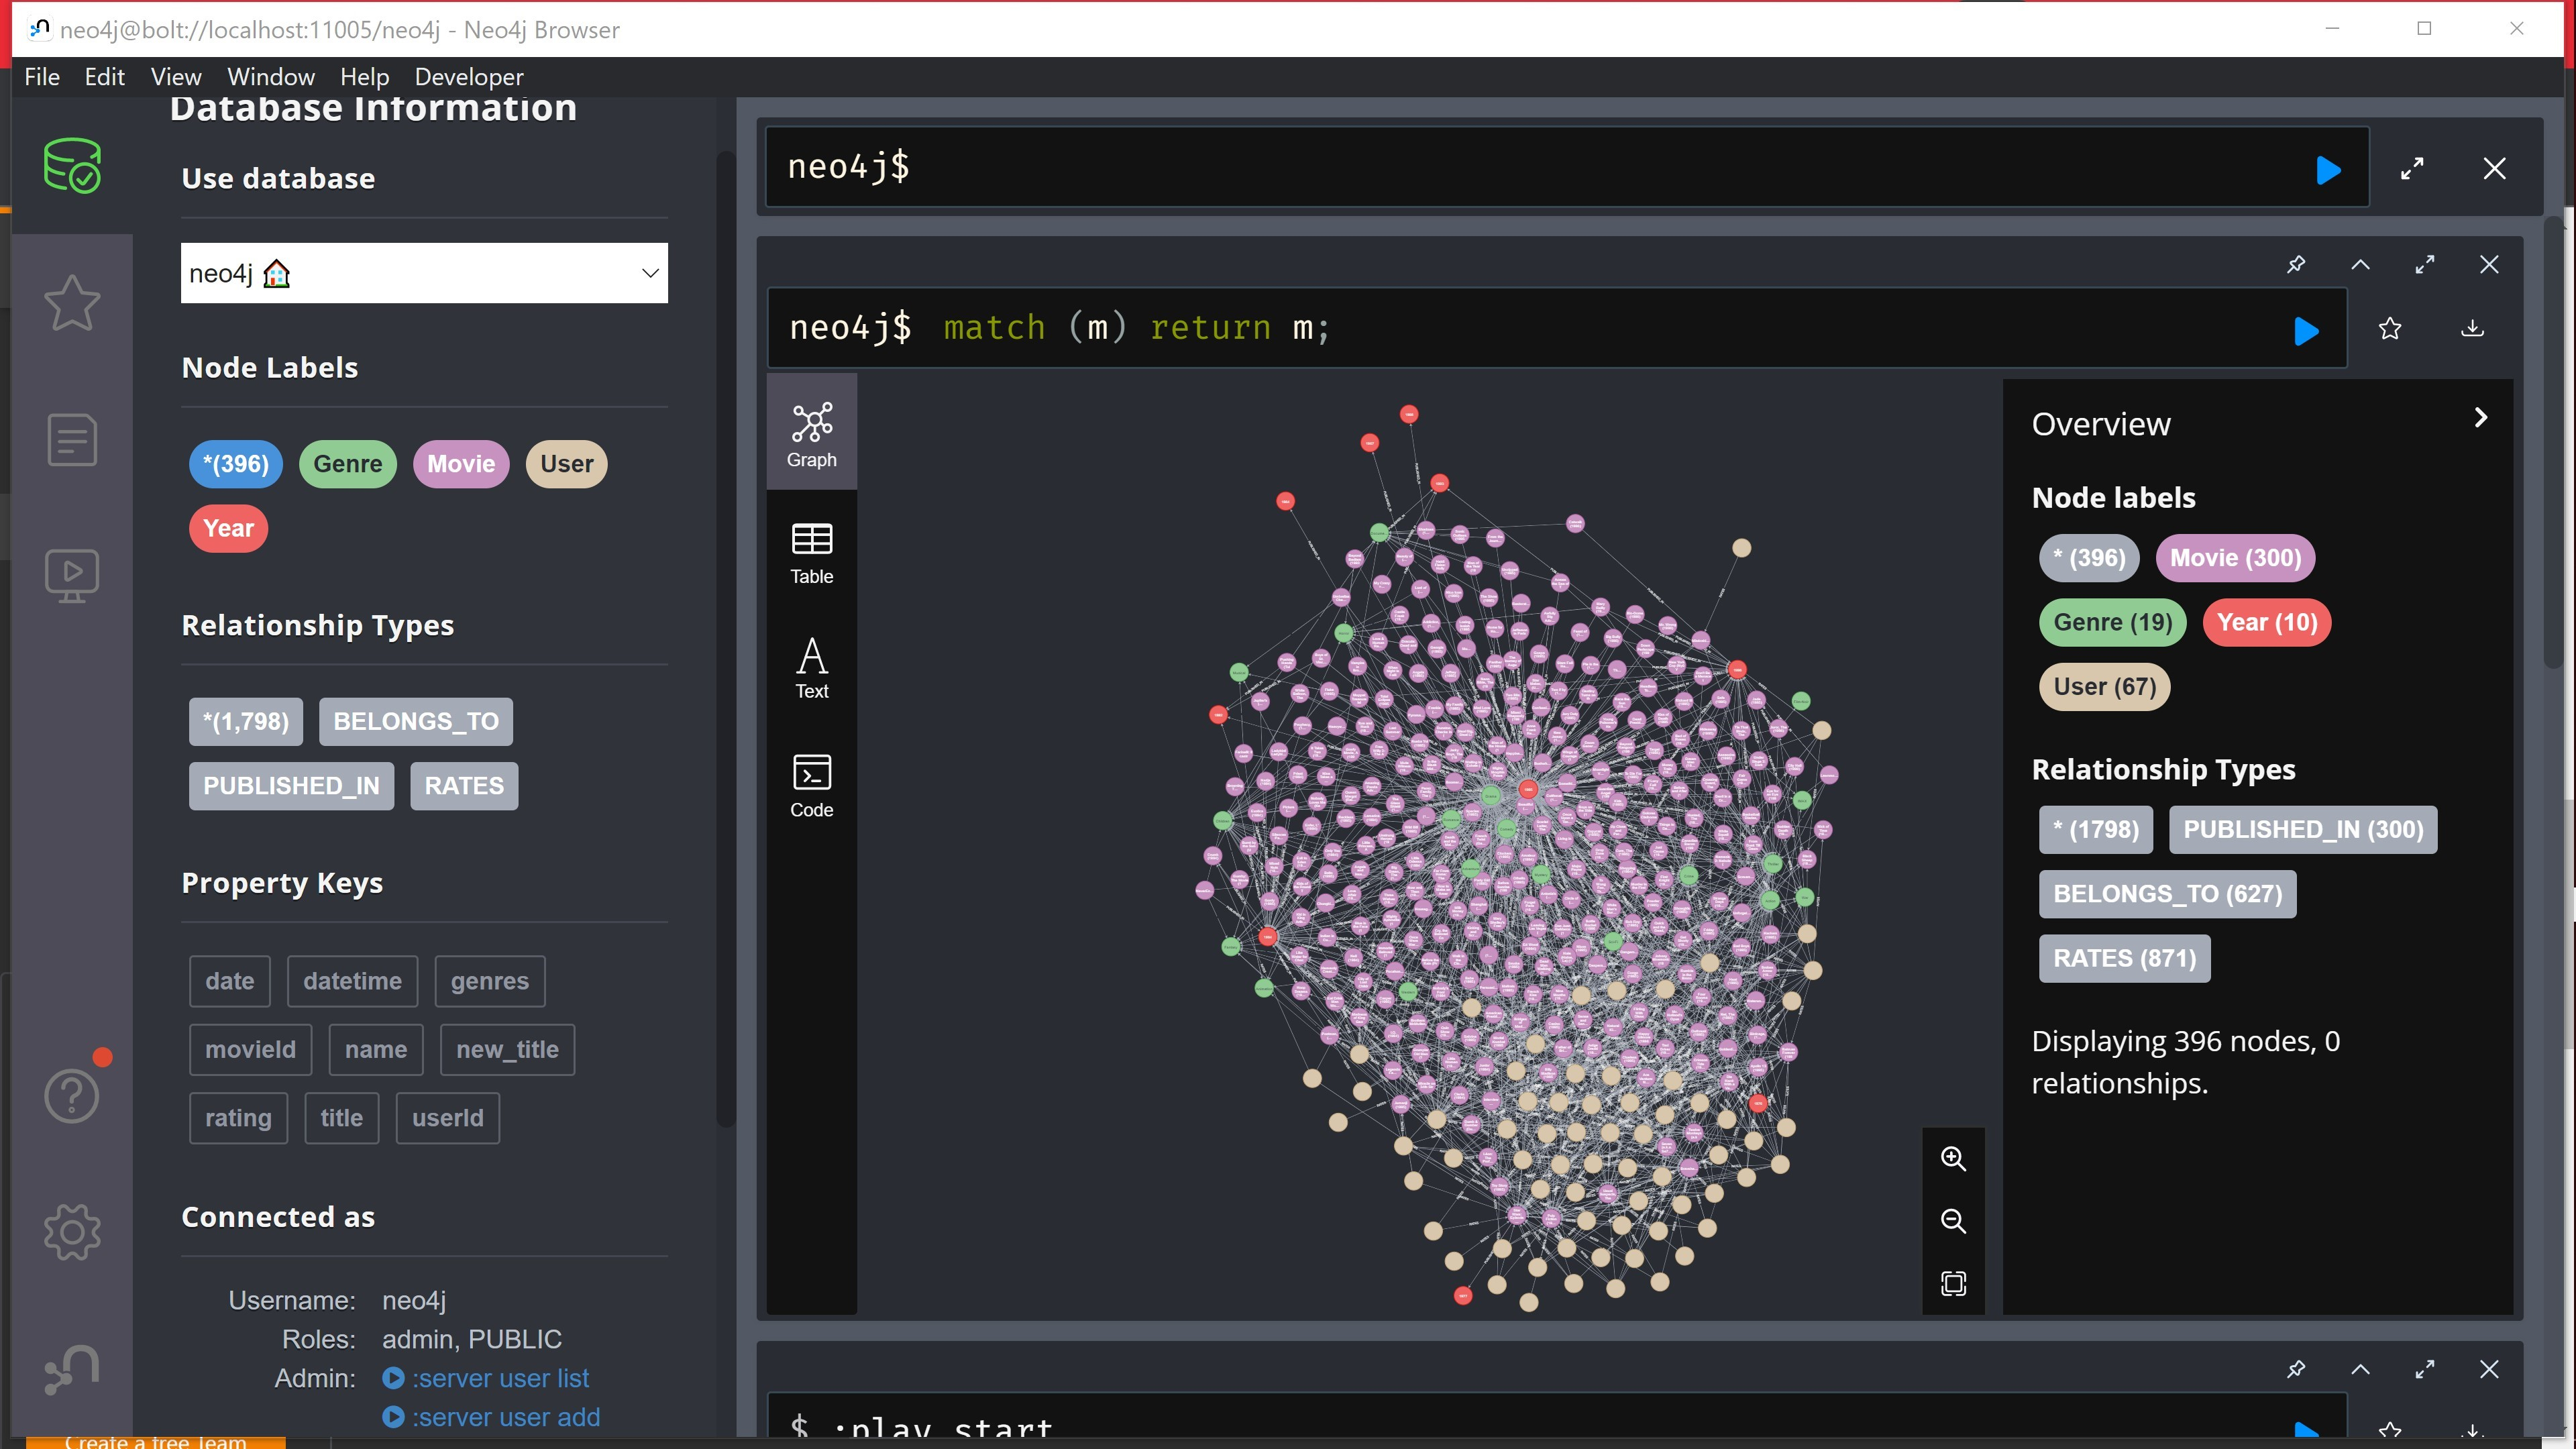

In [9]:
Image(filename='../images/300_movies_10000_ratings.jpg') 

In [10]:
TAGS_LIMIT = 10000
tags_df = read_csv("tags")
tags = df_to_json(tags_df)

Reading from: c:\Users\GiannisAthanasiou\Desktop\diploma\repo\diploma\movies_db\data\tags.csv


In [11]:
insert_tags(graph, tags, TAGS_LIMIT)

##### After storing the tags

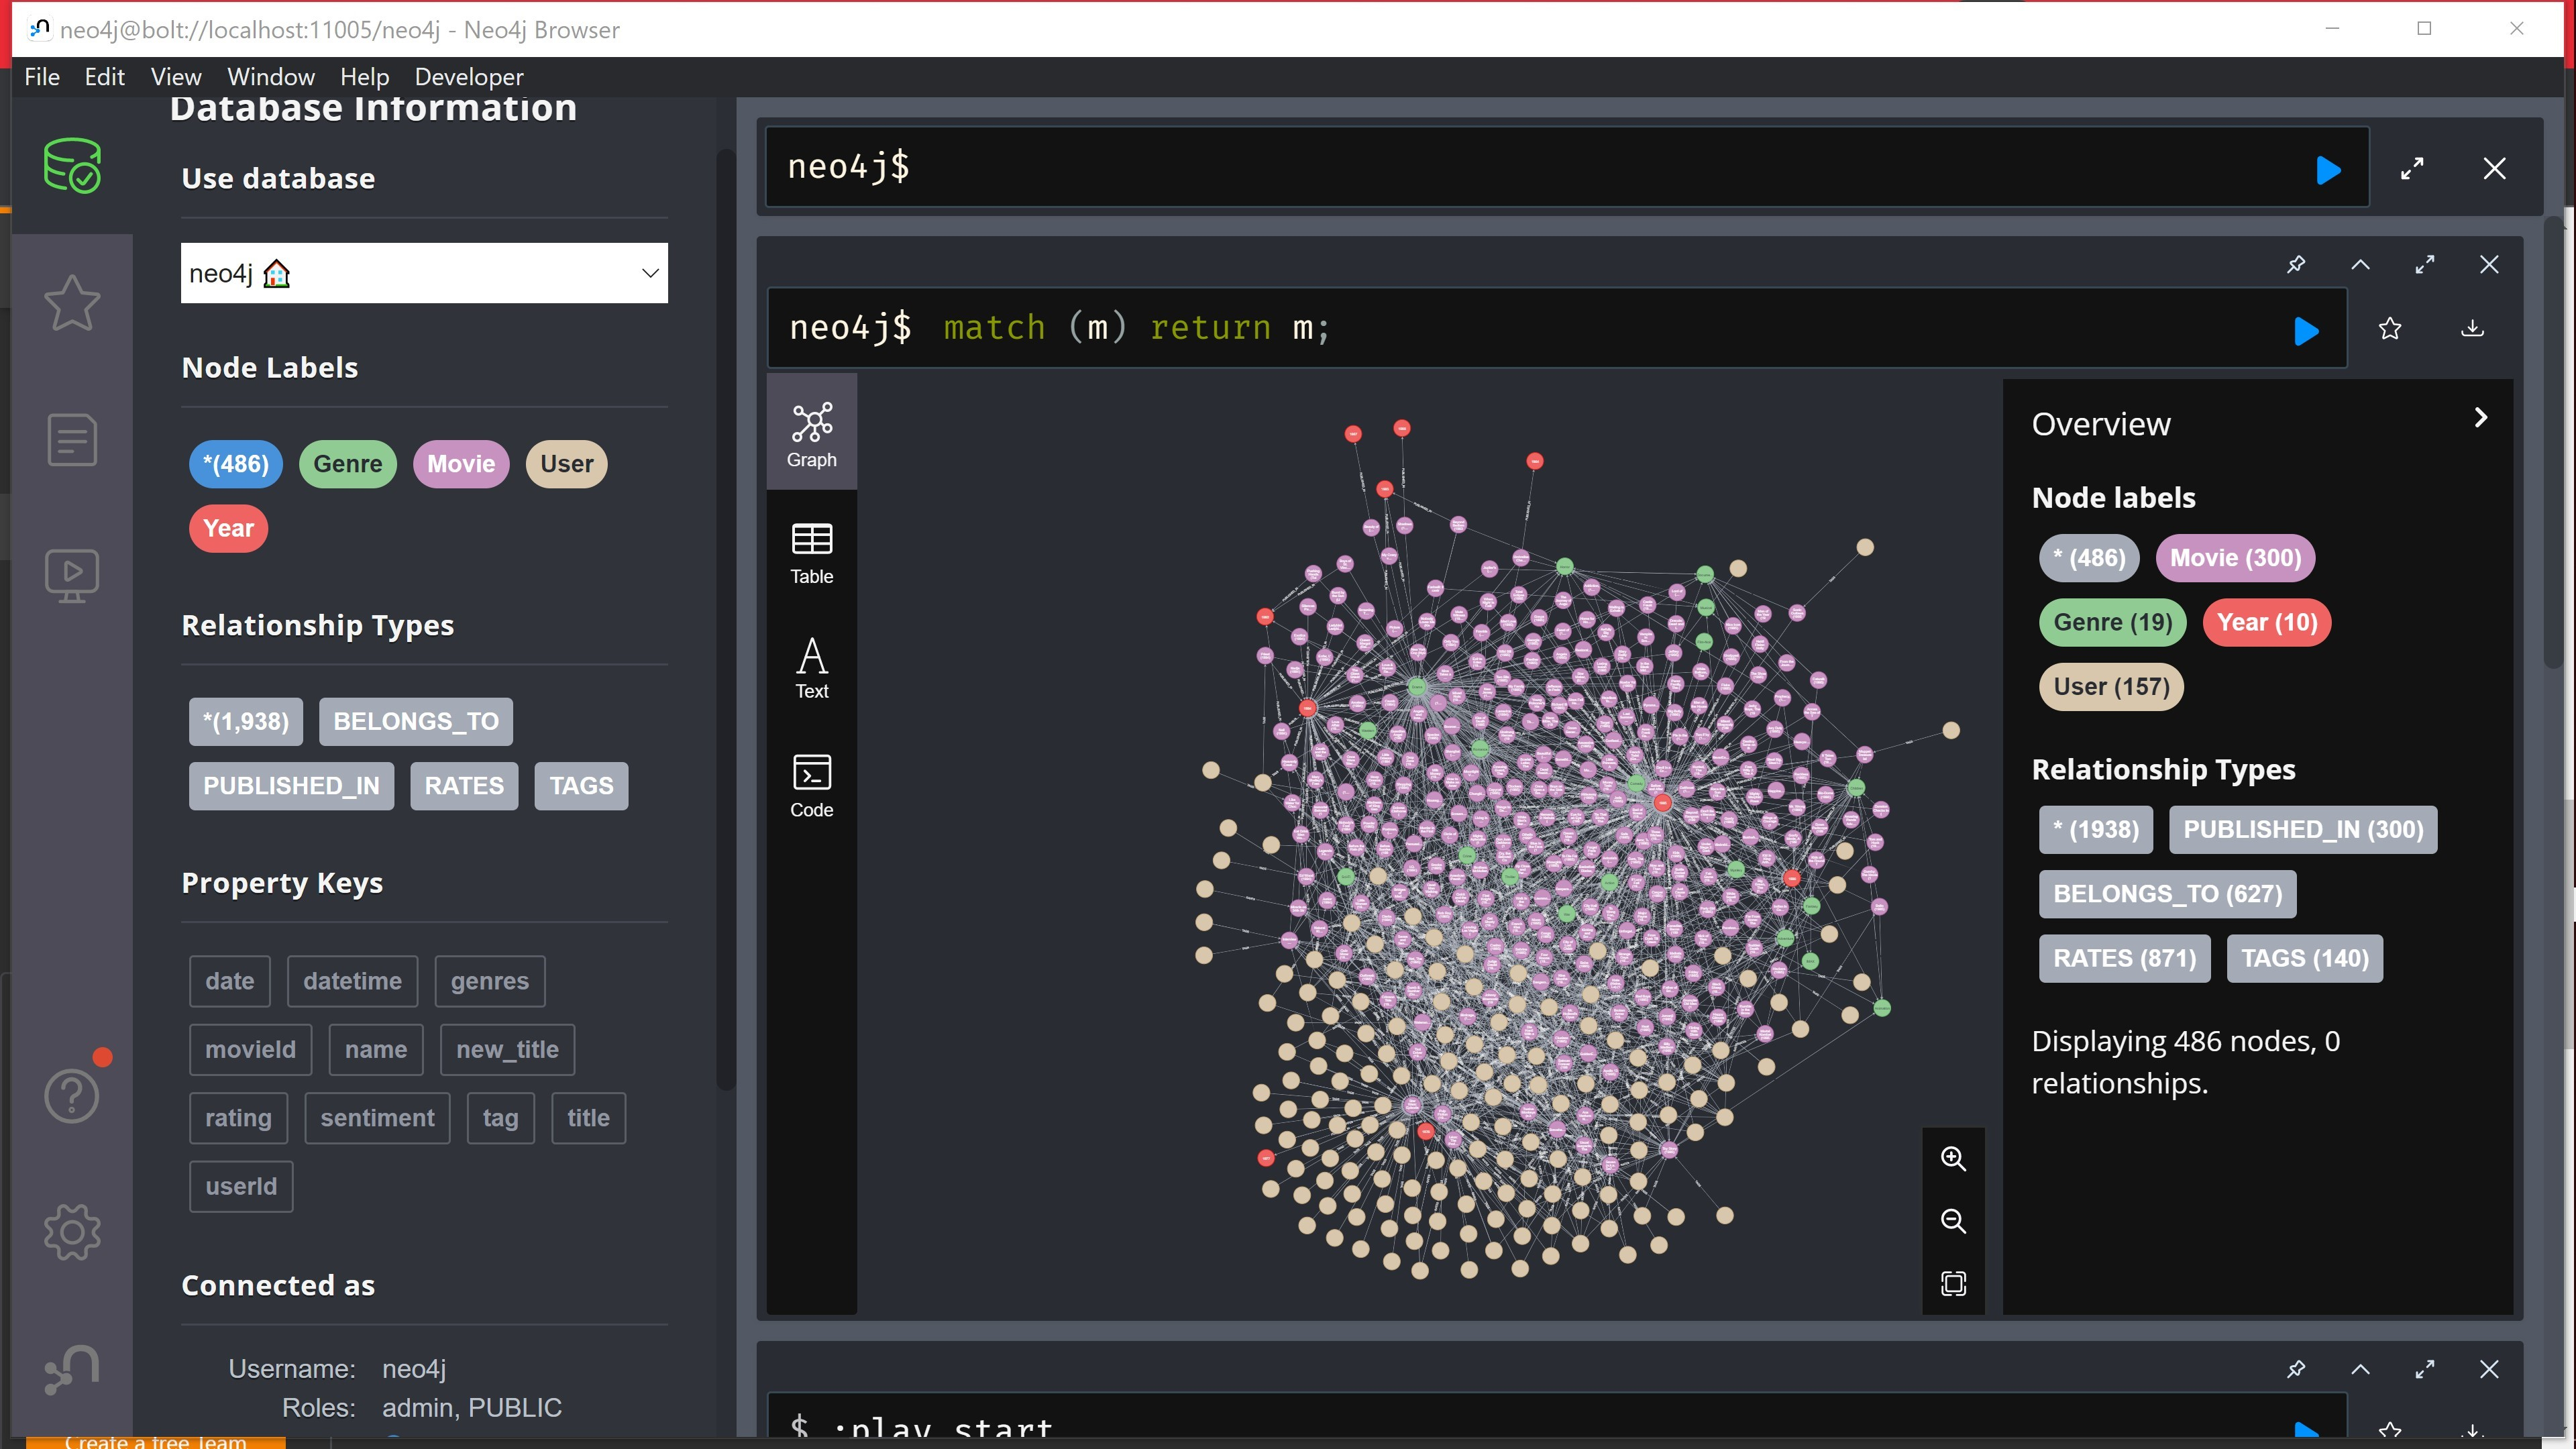

In [12]:
Image(filename='../images/300_movies_10000_ratings_10000_tags.jpg')